# Issu3 6: Find frequncy based end of waveform --- when is the $\ell=m=2$ domainated by noise??

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from nrutils import scsearch,gwylm,jf14067295,Mf14067295
from nrutils.core.units import *
from kerr import *
from matplotlib.pyplot import *
from numpy import array,pi
# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20

(positive)>> Applying custom matplotlib settings.


In [48]:
# Find an NR simulation to play with
AA = scsearch(keyword='hr',q=[11,18],verbose=True,apply_remnant_fit=False)

(scsearch)>> Found apply_remnant_fit (=False) keyword.
(scsearch)>> Found keyword (=hr) keyword.
(scsearch)>> Found q (=...) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][bradwr] HR-series: ns-q15.04	(D7.5_q15.00_a0.0_CHgEEB_m800)



In [49]:
# Load the simuation data (enough to constrain the "orbital phase")
y = gwylm( AA[0], lmax=2, verbose=False, clean=False )

[   0  686  802  888 1172]
5273


(138.44999999999999, 790.94999999999993)

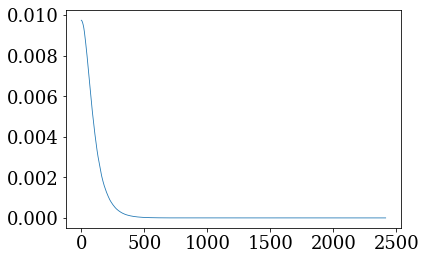

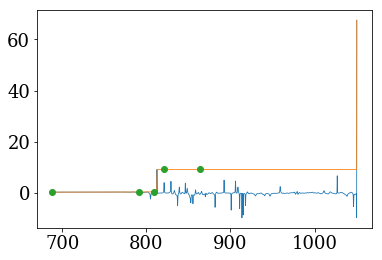

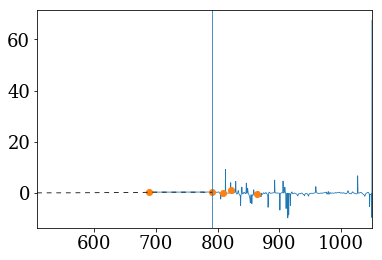

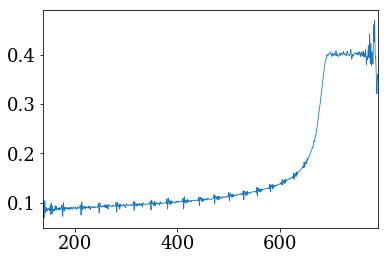

In [50]:
# Put together teh algorithm

from numpy import argmax,diff

A = range( 0, len(y.t) )
# A = range( y.startindex, y.endindex )
AMP = y.lm[2,2]['psi4'].amp[A]
t = y.t[A]

# B = t > t[ argmax(AMP) ]
B = y.t > y.t[ argmax(AMP) ]

plot( AMP[B] )
# #
# def upbow(a):
#     b = a.copy()
#     u = a[0]
#     for k,v in enumerate(a):
#         b[k] = max(u,a[k])
#         u = b[k]
#     return b

figure()
w = y.lm[2,2]['psi4'].dphi[A]
aa = upbow(w[B])
knots,rl = romline(t[B],aa,5)

print knots

plot( t[B],w[B] )
plot(t[B],aa)
plot( t[B][knots], rl( t[B][knots] ), 'o' )
# ylim([0,1])

figure()
# axvline( t[ argmax(diff(E)) ] )
plot( t[B], w[B])
plot( t[B][knots], w[B][knots], 'o' )
#
dex = argmax(AMP) + ( knots[0] if knots[0]>0 else knots[1] )
print dex
axvline( t[ dex ] )
#
mask = range( y.startindex, dex ) 
plot( t[mask], w[mask], '--k' )
xlim( [ min(t[B])-diff(lim(t[B]))/2, max(t[B]) ] )
#
figure()
plot( t[mask], w[mask] )
xlim( [ t[y.startindex], t[dex] ] )

### Test the Pakcage Version of the above algorithm

Here the alorithm has been set to run automatically within the glylm class within gwfcharend.

5273


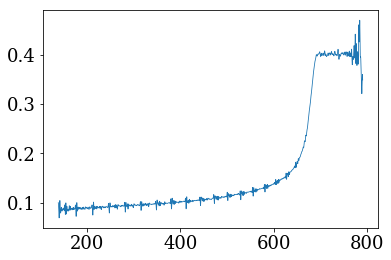

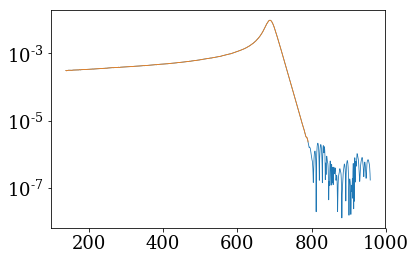

In [52]:
print y.postringdown.frequency_end_index
# mask = range( y.startindex, y.postringdown.left_index )
mask = range( y.startindex, y.endindex_by_frequency )
mask2 = range( y.startindex, y.endindex )

plot( y.lm[2,2]['psi4'].t[mask],  y.lm[2,2]['psi4'].dphi[mask] )
figure()
plot( y.lm[2,2]['psi4'].t[mask2],  y.lm[2,2]['psi4'].amp[mask2] )
plot( y.lm[2,2]['psi4'].t[mask],  y.lm[2,2]['psi4'].amp[mask] )
yscale('log')